In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split


In [9]:
data=pd.read_csv('CA.csv')

#Data Preprocessing
data['HYTCP_scaled']=preprocessing.scale(data['HYTCP'])
data['WYTCP_scaled']=preprocessing.scale(data['WYTCP'])
data['SOEGP_scaled']=preprocessing.scale(data['SOEGP'])
data['NUETP_scaled']=preprocessing.scale(data['NUETP'])

C:\Users\rahul\Miniconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


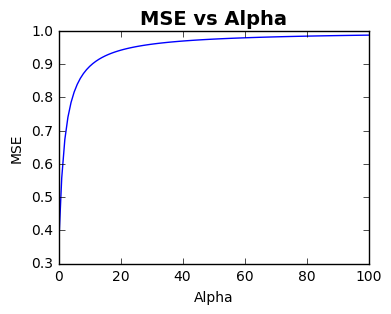

In [10]:
alpha_list=np.linspace(0,100,101)
mse=[]

for i in alpha_list:
    regr=linear_model.Ridge(alpha=i,normalize=True)
    regr.fit(data[['HYTCP_scaled','WYTCP_scaled','NUETP_scaled']],data.SOEGP_scaled)
    mse.append(np.sum((regr.predict(data[['HYTCP_scaled','WYTCP_scaled','NUETP_scaled']])-data.SOEGP_scaled)**2/len(data)))

#Plot
plt.figure(figsize=(4,3))
plt.plot(alpha_list,mse)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs Alpha',fontsize=14,fontweight='bold')
plt.show()

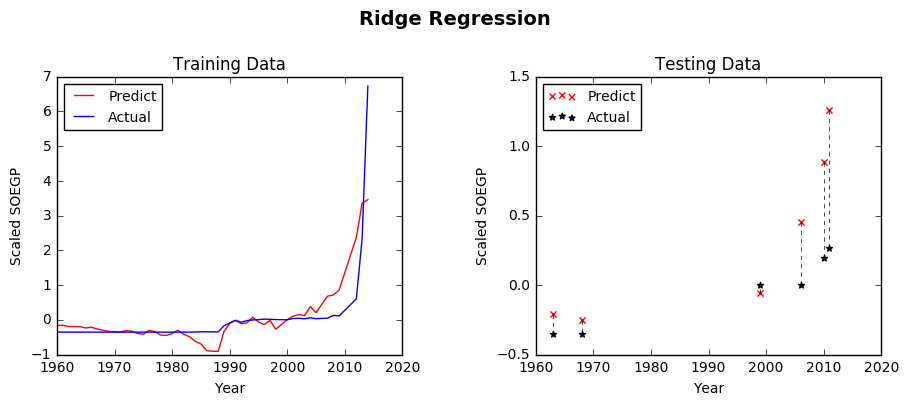

In [11]:
#Dividing data into training and testing data
training, testing = train_test_split(data, test_size = 0.1)
training=training.sort_values('Year')
testing=testing.sort_values('Year')

#Ridge Regression
regr=linear_model.Ridge(alpha=0,normalize=True)
regr.fit(training[['HYTCP_scaled','WYTCP_scaled','NUETP_scaled']],training.SOEGP_scaled)

fig = plt.figure(figsize=(10,4.5))
fig.suptitle('Ridge Regression', fontsize=14, fontweight='bold')

#Plot for training data
fig.add_subplot(121)
plt.plot(training.Year,regr.predict(training[['HYTCP_scaled','WYTCP_scaled','NUETP_scaled']]),label='Predict',c='r')
plt.plot(training.Year,training.SOEGP_scaled,label='Actual')
plt.legend(loc=0,fontsize=10)
plt.title('Training Data')
plt.xlabel('Year')
plt.ylabel('Scaled SOEGP')

#Plot for testing data
fig.add_subplot(122)
plt.scatter(testing.Year,regr.predict(testing[['HYTCP_scaled','WYTCP_scaled','NUETP_scaled']]),marker='x',c='r',label='Predict')
plt.scatter(testing.Year,testing.SOEGP_scaled, marker='*',label='Actual')
a=list(testing.Year)
b=regr.predict(testing[['HYTCP_scaled','WYTCP_scaled','NUETP_scaled']])
c=list(testing.SOEGP_scaled)
for i in range(len(a)):
    plt.plot([a[i],a[i]],[b[i],c[i]],'k--',linewidth=0.5,dashes=(3,3))
plt.legend(loc=2,fontsize=10)
plt.title('Testing Data')
plt.xlabel('Year')
plt.ylabel('Scaled SOEGP')

plt.tight_layout(pad=4, w_pad=4)
plt.show()